# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [116]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [120]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [122]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [123]:
# Extract all rows of data
table = soup.find('table', class_='table')
mars_temp_header = table.find_all('th')
header_list = []
for rows in mars_temp_header:
    header = rows.text
    header_list.append(header)
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [126]:
# Create an empty list
mars_temp_list = []
mars_temp_dict = {}
# Loop through the scraped data to create a list of rows
mars_temp_all_rows = table.find_all('tr')
for rows in mars_temp_all_rows:
    columns = rows.find_all('td')
    mars_temp_dict = [column.text.strip() for column in columns]
    mars_temp_list.append(mars_temp_dict)
mars_temp_list

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [127]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(mars_temp_list)
mars_temp_df=mars_temp_df.iloc[1:]
mars_temp_df.head()


,0,1,2,3,4,5,6
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


In [128]:
# Confirm DataFrame was created successfully
mars_temp_df.columns = header_list
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [131]:
# Examine data type of each column
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [132]:
# Change data types for data analysis
mars_temp_df = mars_temp_df.astype({
    'sol': 'int',
    'ls':'int',
    'month':'int',
    'min_temp':'float',
    'pressure':'float'
})
#mars_temp_df['terrestrial_date'] = mars_temp_df.to_datetime(mars_temp_df['terrestrial_date'], format='%d-%m-%Y')
#mars_temp_df
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date']) #, format='%d-%m-%Y')
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [133]:
# Confirm type changes were successful by examining data types again
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [135]:
# 1. How many months are there on Mars?
#months_count = mars_temp_df.count() distinct
months_count = mars_temp_df['month'].nunique()
months_count

12

In [136]:
# 2. How many sols (Martian days) worth of data are there?
sols_count = mars_temp_df['sol'].nunique()
sols_count

1867

In [137]:
# 3. What is the average minimum temperature by month?
# Calculate the average minimum temperature for each month
monthly_avg_min_temp = mars_temp_df.groupby('month')['min_temp'].mean() #.reset_index()

# Display the result
print(monthly_avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


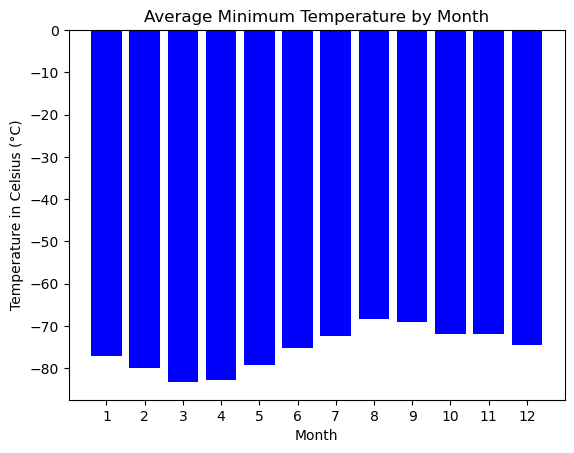

In [138]:
# Plot the average minimum temperature by month
plt.bar(monthly_avg_min_temp.index,monthly_avg_min_temp.values, color='blue')
#plt.bar(monthly_avg_min_temp['month'], monthly_avg_min_temp['avg_min_temp'], color='blue')

# Adding titles and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius (°C)')
plt.xticks(monthly_avg_min_temp.index) #monthly_avg_min_temp['month'])  # Ensure all months are labeled on the x-axis

# Show the plot
plt.show()


Coldest Month: 3, Temperature: -83.30729166666667
Hottest Month: 8, Temperature: -68.38297872340425


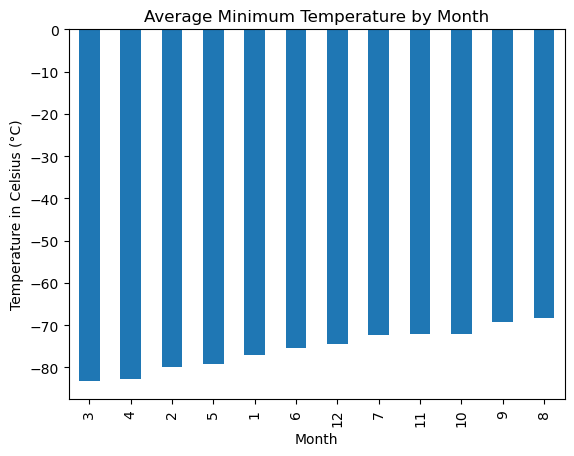

In [139]:
monthly_avg_min_temp.sort_values().plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius (°C)')

print(f"Coldest Month: {monthly_avg_min_temp.idxmin()}, Temperature: {monthly_avg_min_temp.min()}")
print(f"Hottest Month: {monthly_avg_min_temp.idxmax()}, Temperature: {monthly_avg_min_temp.max()}")

In [140]:
# 4. What is the average pressure by month?
# Calculate the average minimum temperature for each month
monthly_avg_pressure = mars_temp_df.groupby('month')['pressure'].mean()

# Display the result
print(monthly_avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


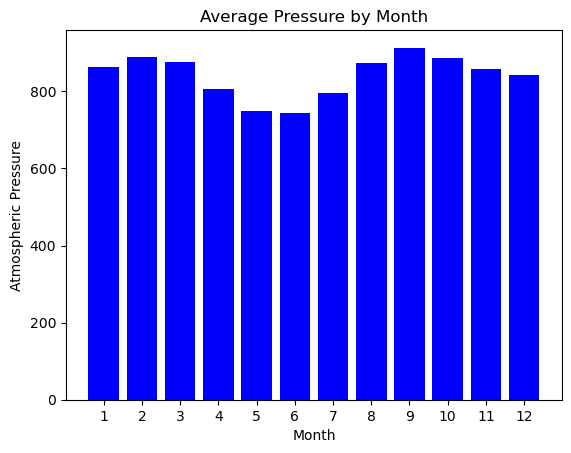

In [141]:
# Plot the average pressure by month
plt.bar(monthly_avg_pressure.index, monthly_avg_pressure.values, color='blue')

# Adding titles and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(monthly_avg_pressure.index)  # Ensure all months are labeled on the x-axis

# Show the plot
plt.show()

Lowest Pressure Month: 6, Temperature: 745.0544217687075
Highest Pressure Month: 9, Temperature: 913.3059701492538


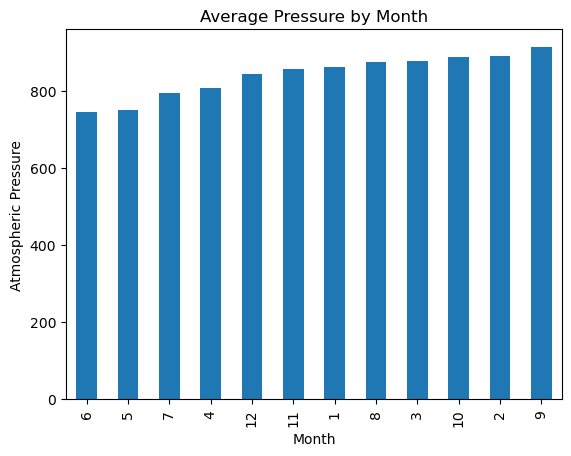

In [142]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
monthly_avg_pressure.sort_values().plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

print(f"Lowest Pressure Month: {monthly_avg_pressure.idxmin()}, Temperature: {monthly_avg_pressure.min()}")
print(f"Highest Pressure Month: {monthly_avg_pressure.idxmax()}, Temperature: {monthly_avg_pressure.max()}")

In [143]:
mars_min = mars_temp_df.ls.min()
mars_year_df = mars_temp_df[mars_temp_df.ls==mars_min]
mars_year_df






,id,terrestrial_date,sol,ls,month,min_temp,pressure
305,320,2013-08-01,351,0,1,-75.0,853.0
306,319,2013-08-02,352,0,1,-77.0,854.0
926,954,2015-06-19,1019,0,1,-81.0,849.0
927,938,2015-06-20,1020,0,1,-63.0,832.0
1580,1606,2017-05-06,1688,0,1,-76.0,840.0
1581,1610,2017-05-07,1689,0,1,-75.0,840.0


Text(0.5, 1.0, 'Temperature cycle over time')

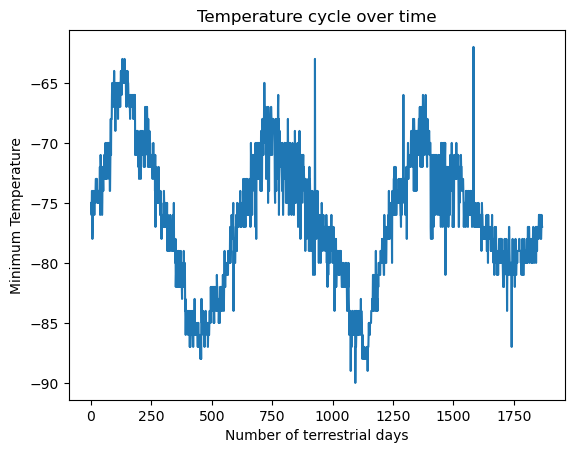

In [150]:

# 5. How many terrestrial (Earth) days are there in a Martian year? 1earth year =
mars_temp_df.min_temp.plot()
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")
plt.title("Temperature cycle over time")

           
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

#### Minimum Temperature
Coldest Month: 3, Temperature: -83.30729166666667


#### Atmospheric Pressure
Lowest Pressure Month: 6, Temperature: 745.0544217687075
Highest Pressure Month: 9, Temperature: 913.3059701492538E

#### Year Length
Year length = 6688E

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [167]:
# Write the data to a CSV
mars_temp_df.to_csv("mars_temp.csv", index=False, header=True)

In [169]:
browser.quit()